# Plot C2D RGB Images - Chameleon

## Load Enviroments

In [21]:
from itertools import combinations
from os import path

import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np
import aplpy
import time

## Generate RGB Cube (Stack 3 Fits Files)

In [22]:
def Generate_RGB_Cube(Output_path, Fits_list, RGB_index, Band_short_list, Overwrite=False):
    '''
    Generate RGB cube by stacking 3 input fitsfiles
    '''
    
    t_start = time.time()

    # Skip existed files
    if path.isfile('{}/{}_{}_{}_{}_cube.fits'.format(
                    Output_path, Cloud, 
                    Band_short_list[RGB_index[0]],
                    Band_short_list[RGB_index[1]],
                    Band_short_list[RGB_index[2]]
                    )
                  ) and (not Overwrite):
        print('RGB Cube already exists ... [SKIPPED]')
        
    # Overwrite file if it exists
    else:
        # Generate rgb cube fits by aplpy
        print('Generate RGB Cube Fits File ...')
        aplpy.make_rgb_cube([Fits_list[RGB_index[0]],
                             Fits_list[RGB_index[1]],
                             Fits_list[RGB_index[2]]],
                            '{}/{}_{}_{}_{}_cube.fits'.format(
                             Output_path, Cloud, 
                             Band_short_list[RGB_index[0]],
                             Band_short_list[RGB_index[1]],
                             Band_short_list[RGB_index[2]]
                            )
                           )

    t_end   = time.time()
    print('\nGenerate RGB cube fits by aplpy took {:.3f} secs'.format(t_end - t_start))
    
def Generate_RGB_Image(Output_path, Cloud, Band_short_list, RGB_index):
    '''
    Generate RGB image from existing RGB cube
    '''
    
    t_start = time.time()

    # Generate rgb image from rgb cube fits
    print('Generate RGB Image File ...')
    aplpy.make_rgb_image('{}/{}_{}_{}_{}_cube.fits'.format(
                          Output_path, Cloud, 
                          Band_short_list[RGB_index[0]],
                          Band_short_list[RGB_index[1]],
                          Band_short_list[RGB_index[2]]
                         ),
                         '{}/{}_{}_{}_{}_cube.png'.format(
                          Output_path, Cloud, 
                          Band_short_list[RGB_index[0]],
                          Band_short_list[RGB_index[1]],
                          Band_short_list[RGB_index[2]]
                         )
                        )
    
    t_end   = time.time()
    print('\nGenerate RGB Image File by aplpy took {:.3f} secs'.format(t_end - t_start))
    
def Generate_RGB_Image_WI_Axes(Output_path, Cloud, Band_short_list, RGB_index):
    '''
    Generate RGB image from existing RGB cube WI axes (RA, DEC)
    '''
    # Set RGB Image 2D coordinate
    f = aplpy.FITSFigure('{}/{}_{}_{}_{}_cube_2d.fits'.format(
                          Output_path, Cloud, 
                          Band_short_list[RGB_index[0]],
                          Band_short_list[RGB_index[1]],
                          Band_short_list[RGB_index[2]]
                         )
                        )

    # Plot RGB Image
    f.show_rgb('{}/{}_{}_{}_{}_cube.png'.format(
                Output_path, Cloud, 
                Band_short_list[RGB_index[0]],
                Band_short_list[RGB_index[1]],
                Band_short_list[RGB_index[2]]
                )
               )

    # Set RGB Image title
    f.set_title('{} -  R:{}, G:{}, B:{}'.format(
                 Cloud, 
                 Band_short_list[RGB_index[0]],
                 Band_short_list[RGB_index[1]],
                 Band_short_list[RGB_index[2]]
                )
               )

    # Save RGB Image with title
    f.savefig('{}/{}_{}_{}_{}_RGB.png'.format(
               Output_path, Cloud, 
               Band_short_list[RGB_index[0]],
               Band_short_list[RGB_index[1]],
               Band_short_list[RGB_index[2]]
              )
             )

## Input Variables

In [3]:
# Path variables
Cloud = 'CHA_II'
Output_path = '/mazu/users/jordan/YSO_Project/C2D_RGB'

# Bands of mosaic fits
Band_list = ['IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1']
Band_short_list = ['IR1', 'IR2', 'IR3', 'IR4', 'MP1']
Wavlength_list  = [3.6, 4.5, 5.8, 8.0, 24.0]

# Mosaic fits list
Mosaic_path = '/home/jordan/YSO_Project/Spitzer_C2D/{}/MOSAICS'.format(Cloud)
Mosaic_fits_list = ['{}/{}_A_{}_mosaic.fits'.format(
                    Mosaic_path, Cloud, Band) for Band in Band_list]
Fits_list = Mosaic_fits_list

## Load Fits Files For All Bands

In [4]:
def Find_Bins(observations, width):
    '''
    Find bins for matplotlib histogram
    '''
    minimmum = np.min(observations)
    maximmum = np.max(observations)
    bound_min = -1.0 * (minimmum % width - minimmum)
    bound_max = maximmum - maximmum % width + width
    n = int((bound_max - bound_min) / width) + 1
    bins = np.linspace(bound_min, bound_max, n)
    return bins

def Plot_All_Bands_Data(Data_list, Band_list):
    '''
    Plot data point distribution for input data list for all bands
    '''
    t_start = time.time()
    
    plt.figure(figsize=(6*len(Data_list), 6))
    for i in range(len(Data_list)):
        plt.subplot(1, len(Data_list), i+1)
        data = Data_list[i]
        data = data.flatten()
        data = data[~np.isnan(data)]
    
        bins = Find_Bins(data, 5.0)
        plt.hist(data, bins=bins)
        plt.yscale('log')
        plt.title(Band_list[i])

    plt.tight_layout()
    plt.show()
    
    t_end   = time.time()
    print('Plot Fits File Histogram took {:.3f} secs'.format(t_end - t_start))

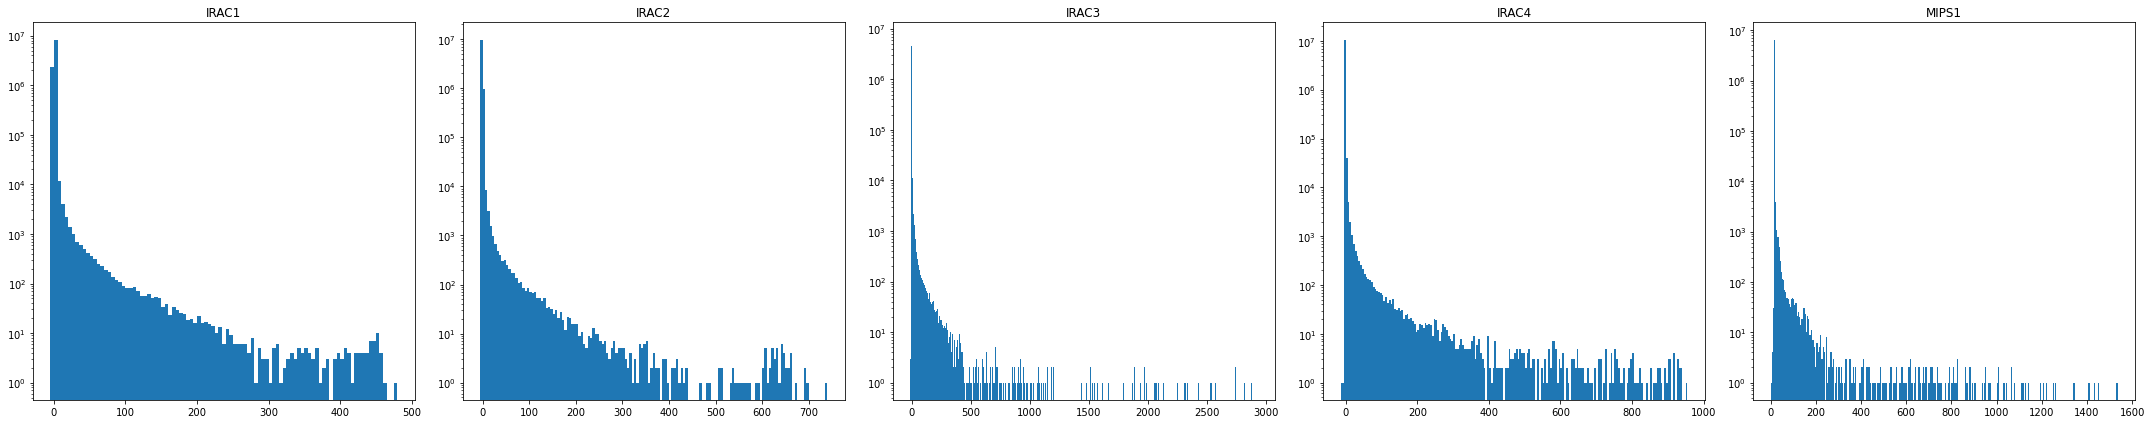

Plot Fits File Histogram took 11.358 secs


In [5]:
Data_list = [pyfits.getdata(Mosaic_fits) for Mosaic_fits in Mosaic_fits_list]
Plot_All_Bands_Data(Data_list, Band_list)

[4, 3, 2]
Generate RGB Cube Fits File ...

Generate RGB cube fits by aplpy took 224.037 secs
Generate RGB Image File ...
INFO: Red: [aplpy.rgb]
INFO: vmin =  1.606e+01 (auto) [aplpy.rgb]
INFO: vmax =  1.717e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin = -2.296e+00 (auto) [aplpy.rgb]
INFO: vmax =  1.612e-01 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin = -6.785e-01 (auto) [aplpy.rgb]
INFO: vmax =  1.151e+01 (auto) [aplpy.rgb]

Generate RGB Image File by aplpy took 11.771 secs
[4, 3, 1]
Generate RGB Cube Fits File ...

Generate RGB cube fits by aplpy took 163.788 secs
Generate RGB Image File ...
INFO: Red: [aplpy.rgb]
INFO: vmin =  1.610e+01 (auto) [aplpy.rgb]
INFO: vmax =  1.752e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin = -2.290e+00 (auto) [aplpy.rgb]
INFO: vmax =  1.125e+00 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin = -1.685e-01 (auto) [aplpy.rgb]
INFO: vmax =  3.323e+00 (auto) [aplpy.rgb]

Generate RGB Image File by aplpy took 11.597 s

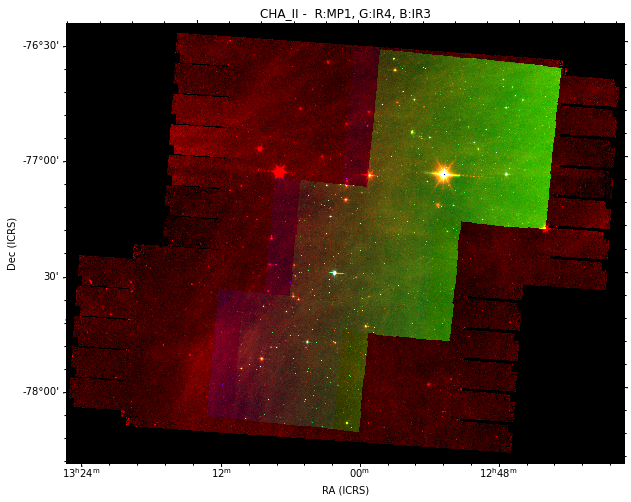

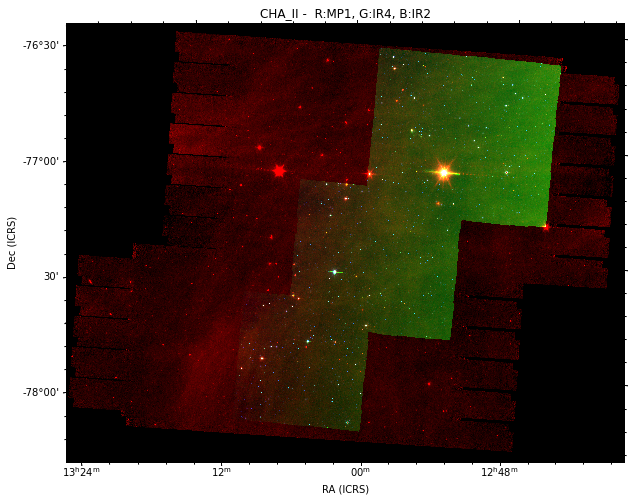

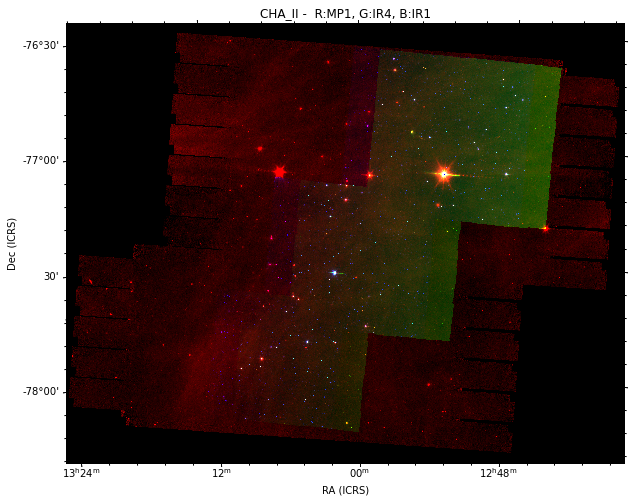

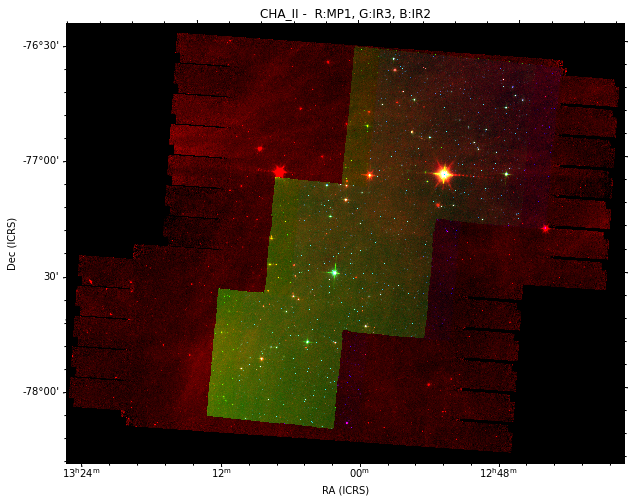

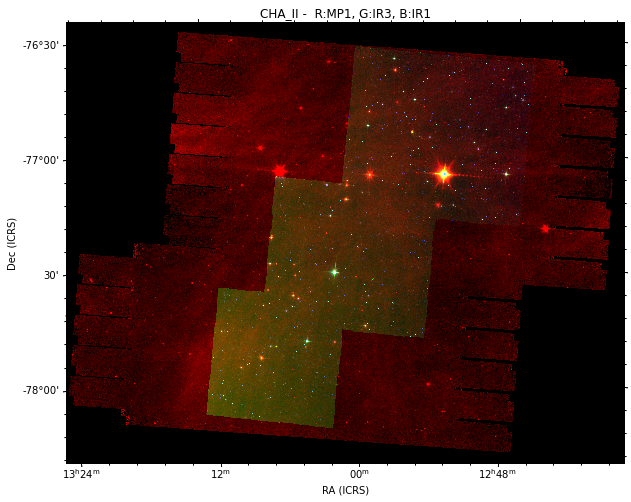

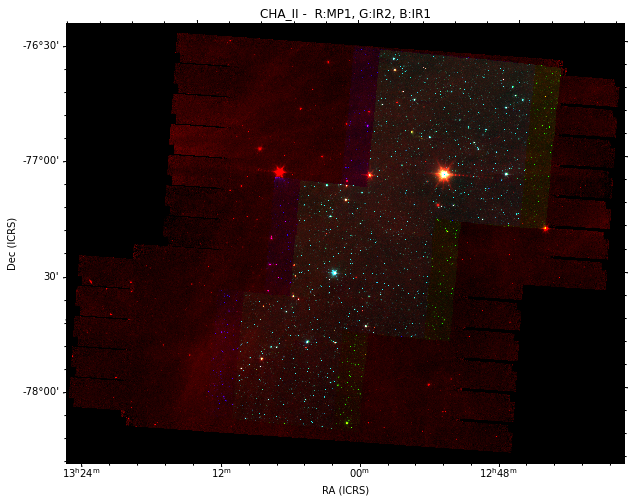

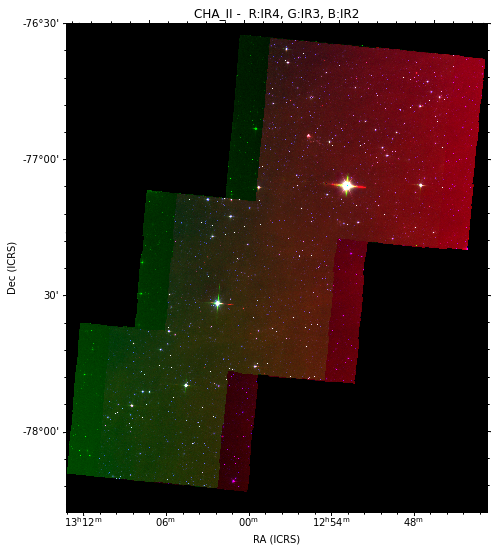

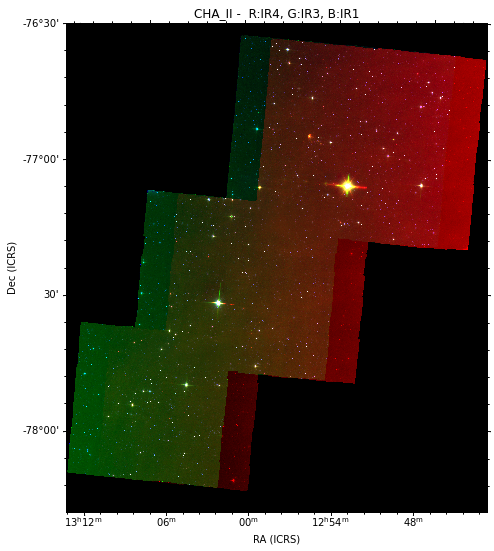

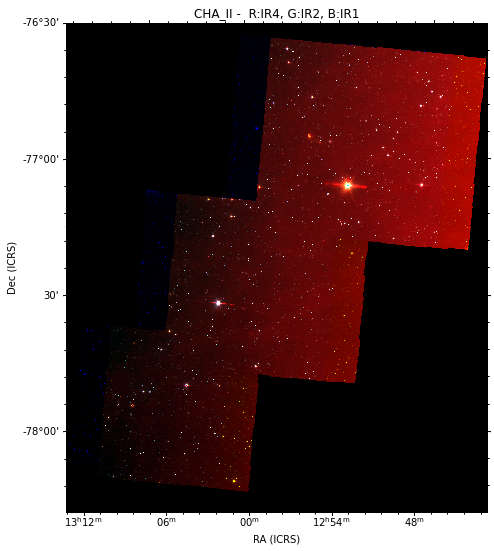

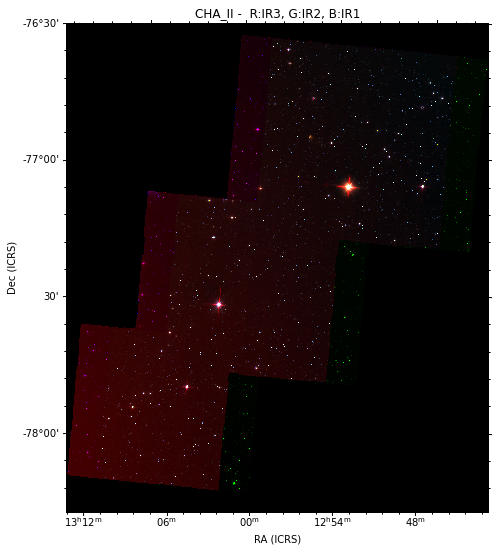

In [6]:
# Index should start from 4(MP!) -> 0(IR1) (Since wavelength of MP1 is longer than the one of IR1)
for comb in combinations([4, 3, 2, 1, 0], 3):
    print(list(comb))
    RGB_index = comb
    Generate_RGB_Cube(Output_path, Fits_list, RGB_index, Band_short_list)
    Generate_RGB_Image(Output_path, Cloud, Band_short_list, RGB_index)
    Generate_RGB_Image_WI_Axes(Output_path, Cloud, Band_short_list, RGB_index)

# Plot C2D RGB Image With YSO Result

## Get YSO Coordinates (RA, DEC)

In [12]:
def Get_Coord_list(Table):
    '''
    Get Coordinate (RA, DEC) from SWIRE format table
    '''
    Coord_list = []
    with open(Table, 'r') as tbl:
        lines = tbl.readlines()
        for line in lines:
            Coord_list.append([float(line.split()[0]), 
                               float(line.split()[2])])
    return Coord_list  

def Get_YSO_Coordinates(Result_path, Cloud, Verbose=True):
    '''
    Get all YSO candidates and results compared with Hsieh's YSO
    '''
    Total_New_YSO_tbl = '{}/{}_6D_YSO.tbl'.format(Result_path, Cloud)
    Hsieh_And_New_IC_YSO_tbl = '{}/AND_{}_6D_GP_IC_all_Hsieh_YSOc.tbl'.format(Result_path, Cloud)
    Hsieh_Not_New_YSO_tbl = '{}/DIFF_{}_YSO.tbl'.format(Result_path, Cloud)
    Hsieh_And_New_YSO_tbl = '{}/AND_{}_YSO_all_Hsieh_YSOc.tbl'.format(Result_path, Cloud)
    Total_Hsieh_YSO_tbl = '{}/ALL_and_{}.tbl'.format(Hsieh_path, Cloud)
    
    Total_New_YSO_Coord = np.array(Get_Coord_list(Total_New_YSO_tbl))
    Hsieh_And_New_IC_YSO_Coord = np.array(Get_Coord_list(Hsieh_And_New_IC_YSO_tbl))
    Hsieh_Not_New_YSO_Coord = np.array(Get_Coord_list(Hsieh_Not_New_YSO_tbl))
    Hsieh_And_New_YSO_Coord = np.array(Get_Coord_list(Hsieh_And_New_YSO_tbl))
    Total_Hsieh_YSO_Coord = np.array(Get_Coord_list(Total_Hsieh_YSO_tbl))
    
    if Verbose:
        print('Total Hsieh YSO #: {:d}'.format(len(Total_Hsieh_YSO_Coord)))
        print('Total New YSO   #: {:d}'.format(len(Total_New_YSO_Coord)))
        print('New_IC & Hsieh  #: {:d}'.format(len(Hsieh_And_New_IC_YSO_Coord)))
        print('Hsieh - New YSO #: {:d}'.format(len(Hsieh_Not_New_YSO_Coord)))
        print('Hsien & New YSO #: {:d}'.format(len(Hsieh_And_New_YSO_Coord)))
        
    
    return Total_New_YSO_Coord, Hsieh_And_New_IC_YSO_Coord, Hsieh_Not_New_YSO_Coord, \
           Hsieh_And_New_YSO_Coord, Total_Hsieh_YSO_Coord

## Plot RGB Image WI YSO markers

In [25]:
def Plot_RGB_Image_WI_YSO(Output_path, Result_path, Cloud, Band_short_list, RGB_index):
    '''
    Plot Cloud RGB Image with YSO markers compared with Hsieh's result
    
    Variables:
        Output_path: path that directs to where RGB.png of cloud is stored
        Result_path: path that directs to where YSO classification is stored
    '''
    
    # Load YSO Result Coordinates
    Total_New_YSO_Coord, Hsieh_And_New_IC_YSO_Coord, Hsieh_Not_New_YSO_Coord, \
    Hsieh_And_New_YSO_Coord, Total_Hsieh_YSO_Coord \
    = Get_YSO_Coordinates(Result_path, Cloud)
    
    
    # Set RGB Image 2D coordinate (Load from previous output)
    f = aplpy.FITSFigure('{}/{}_{}_{}_{}_cube_2d.fits'.format(
                         Output_path, Cloud, 
                         Band_short_list[RGB_index[0]],
                         Band_short_list[RGB_index[1]],
                         Band_short_list[RGB_index[2]]
                         )
                        )

    # Plot RGB Image (Load from previous output)
    f.show_rgb('{}/{}_{}_{}_{}_cube.png'.format(
                Output_path, Cloud, 
                Band_short_list[RGB_index[0]],
                Band_short_list[RGB_index[1]],
                Band_short_list[RGB_index[2]]
                )
               )
    
    # Plot Total Hsieh YSO (Pink Circle)
    f.show_markers(Total_Hsieh_YSO_Coord.T[0],
                   Total_Hsieh_YSO_Coord.T[1],
                   facecolor='none', marker='o',
                   s=20, alpha=0.8, edgecolor='magenta'
                  )
    
    # Plot Total New YSO + IC_And_Hsieh YSO (Cyan Circle)
    f.show_markers(Total_New_YSO_Coord.T[0],
                   Total_New_YSO_Coord.T[1],
                   facecolor='none', marker='o',
                   s=60, alpha=0.8, edgecolor='cyan'
                  )
    f.show_markers(Hsieh_And_New_IC_YSO_Coord.T[0],
                   Hsieh_And_New_IC_YSO_Coord.T[1],
                   facecolor='none', marker='o',
                   s=60, alpha=0.8, edgecolor='cyan'
                  )
    
    # Plot Hsieh And New YSO + IC_And_Hsieh YSO (Yellow Circle)
    f.show_markers(Hsieh_And_New_YSO_Coord.T[0],
                   Hsieh_And_New_YSO_Coord.T[1],
                   facecolor='none', marker='o',
                   s=100, alpha=0.8, edgecolor='yellow'
                  )
    f.show_markers(Hsieh_And_New_IC_YSO_Coord.T[0],
                   Hsieh_And_New_IC_YSO_Coord.T[1],
                   facecolor='none', marker='o',
                   s=100, alpha=0.8, edgecolor='yellow'
                  )
    
    # Set RGB Image title
    f.set_title('{} -  R:{}, G:{}, B:{}'.format(
                Cloud, 
                Band_short_list[RGB_index[0]],
                Band_short_list[RGB_index[1]],
                Band_short_list[RGB_index[2]]
                )
               )
    
    # Add label for aplpy markers
    plt.scatter([], [], color='magenta', 
                label='YSO (Hsieh) #:{:d}'.format(
                       len(Total_Hsieh_YSO_Coord)))
    plt.scatter([], [], color='cyan', 
                label='YSO (This work) #:{:d}'.format(
                       len(Total_New_YSO_Coord) 
                       + len(Hsieh_And_New_IC_YSO_Coord)))
    plt.scatter([], [], color='yellow', 
                label='YSO (Hsieh & This work) #:{:d}'.format(
                       len(Hsieh_And_New_YSO_Coord) 
                       + len(Hsieh_And_New_IC_YSO_Coord)))
    plt.legend(loc=4)
    
    # Save RGB Image with title
    plt.savefig('{}/{}_{}_{}_{}_RGB_WI_YSO.png'.format(
                 Result_path, Cloud, 
                 Band_short_list[RGB_index[0]],
                 Band_short_list[RGB_index[1]],
                 Band_short_list[RGB_index[2]]
                )
               )
    plt.show()

# SEIP_GP_Bound/Cloud_Classification_GPM_6D_Diag_BD_ORIGINAL/6D_bin1.0_sigma2_bond0_refD5

## Input Variables For YSO Marker on RGB Image (CHA_II)

In [23]:
Cloud = 'CHA_II'
Result_path = '/mazu/users/jordan/YSO_Project/SEIP_GP_Bound/Cloud_Classification_GPM_6D_Diag_BD_ORIGINAL/6D_bin1.0_sigma2_bond0_refD5/{}'.format(Cloud)
Hsieh_path  = '/home/jordan/YSO_Project/YSO_Project/YSO_Hunters_Table/All_Table_To_Compare/SWIRE_format_MC_Hsieh_candidates'
# RGB_index = [4, 2, 0]

[4, 3, 2]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


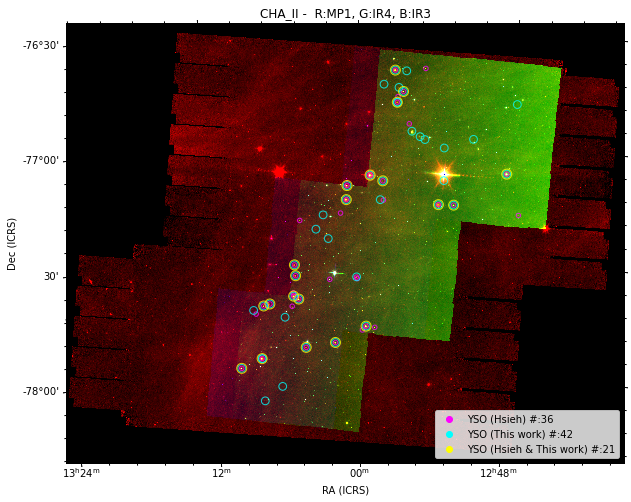

[4, 3, 1]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


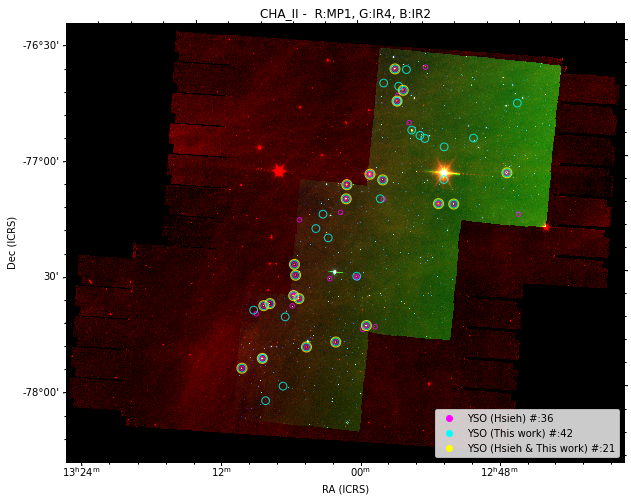

[4, 3, 0]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


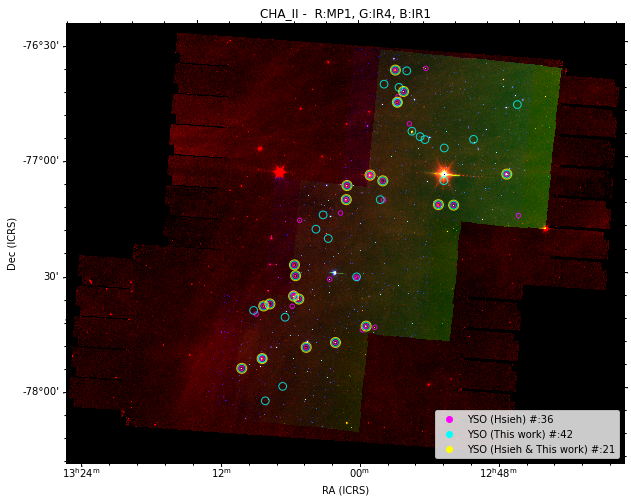

[4, 2, 1]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


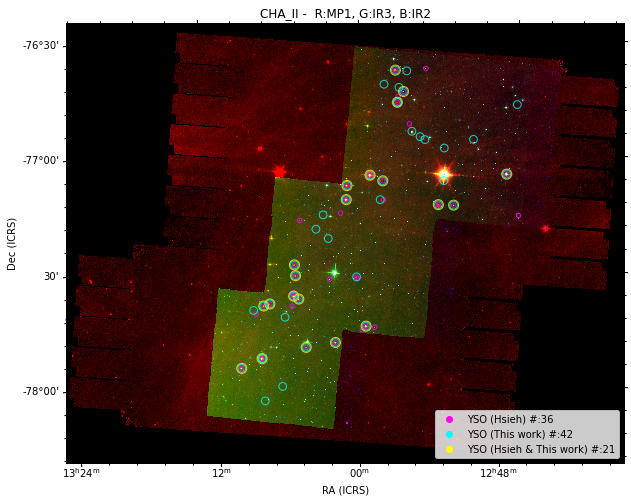

[4, 2, 0]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


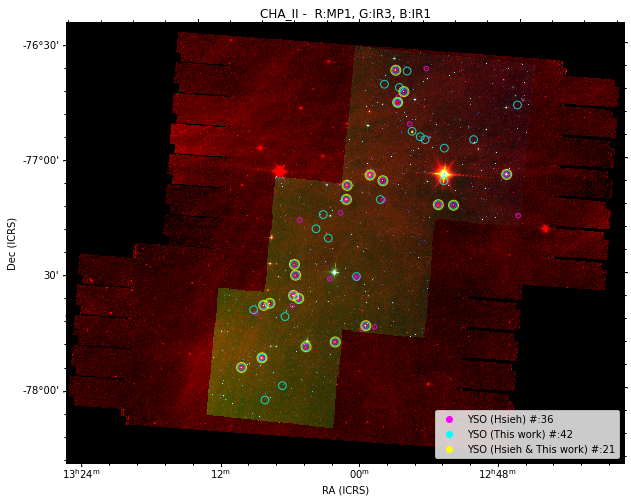

[4, 1, 0]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


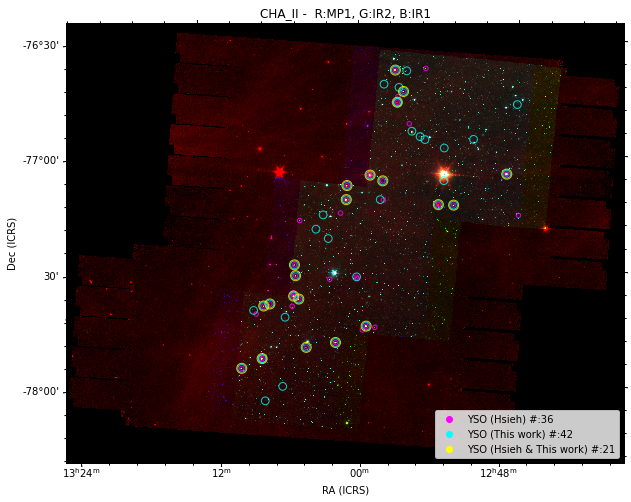

[3, 2, 1]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


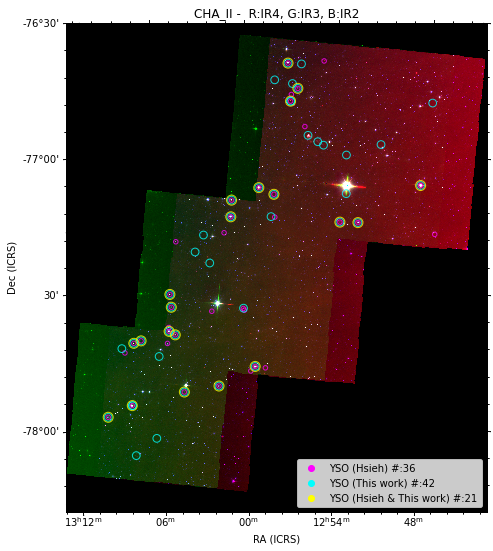

[3, 2, 0]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


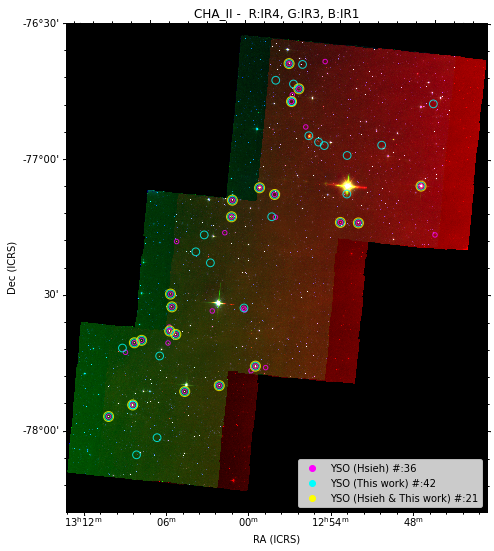

[3, 1, 0]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


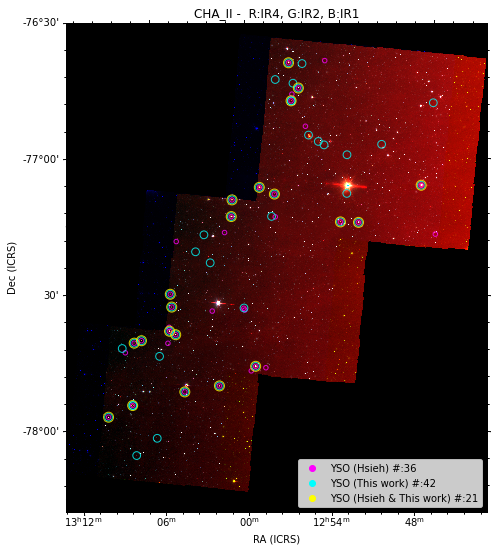

[2, 1, 0]
Total Hsieh YSO #: 36
Total New YSO   #: 41
New_IC & Hsieh  #: 1
Hsieh - New YSO #: 21
Hsien & New YSO #: 20


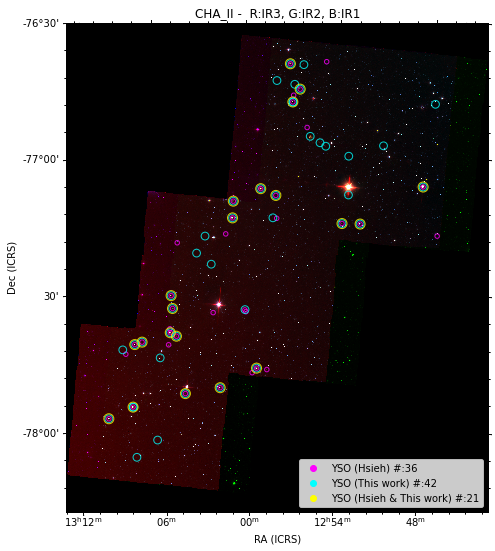

In [26]:
# Index should start from 4(MP!) -> 0(IR1) (Since wavelength of MP1 is longer than the one of IR1)
for comb in combinations([4, 3, 2, 1, 0], 3):
    print(list(comb))
    RGB_index = comb
    Plot_RGB_Image_WI_YSO(Output_path, Result_path, Cloud, Band_short_list, RGB_index)